In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [3]:
import glob
import librosa
import numpy as np

data1 = []
labels1 = []

CAS = glob.glob('/kaggle/input/primaryicbhi2017/mixed_5s/Asthma/*.wav')
CASandDAS = glob.glob('/kaggle/input/primaryicbhi2017/mixed_5s/Asthma/*.wav')
DAS = glob.glob('/kaggle/input/primaryicbhi2017/mixed_5s/COPD/*.wav')
Normal = glob.glob('/kaggle/input/primaryicbhi2017/mixed_5s/Healthy/*.wav')
Poor_Quality = glob.glob('/kaggle/input/primaryicbhi2017/mixed_5s/Pneumonia/*.wav')


SAMPLE_RATE=4000

nsample=16000
for file_path in CAS:   
    #print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal[0:nsample])
#     print(signal.shape)
    data1.append(signal)
    labels1.append(0)

for file_path in CASandDAS:   
   # print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal[0:nsample])
#     print(signal.shape)
    data1.append(signal)
    labels1.append(1)
for file_path in DAS:   
    #print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

    signal=np.array(signal[0:nsample])
#     print(signal.shape)
    data1.append(signal)
    labels1.append(2)

for file_path in Normal:   
   # print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

    
    signal=np.array(signal[0:nsample])
#     print(signal.shape)
    data1.append(signal)
    labels1.append(3)
for file_path in Poor_Quality:   
    #print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    
    signal=np.array(signal[0:nsample])
    if signal.shape==(nsample,):
#     print(signal.shape)
        data1.append(signal)
        labels1.append(4)
    else:
        continue
X_train= np.array(data1)
y_train= np.array(labels1)


In [2]:
import glob
import librosa
import numpy as np

data1 = []
labels1 = []

aorticstenosis = glob.glob('/kaggle/input/15sdataforheartsound/aorticstenosis/*.wav')
mitral_regurgitation = glob.glob('/kaggle/input/15sdataforheartsound/mitral regurgitation/*.wav')
mitral_stenosis = glob.glob('/kaggle/input/15sdataforheartsound/mitral stenosis/*.wav')
mitral_valve_prolapse = glob.glob('/kaggle/input/15sdataforheartsound/mitral valve prolapse/*.wav')
normal = glob.glob('/kaggle/input/15sdataforheartsound/normal/*.wav')

SAMPLE_RATE = 2000
class_names = list(['Aortic Stenosis','Mitral Regurgitation','Mitral Stenosis','Mitral Valve Prolapse', 'Normal'])

for file_path in aorticstenosis:   
    #print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(0)

for file_path in mitral_regurgitation:   
    #print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(1)
    
for file_path in mitral_stenosis:   
    #print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(2)
    
for file_path in mitral_valve_prolapse:
    #print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(3)
    
for file_path in normal:   
    #print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(4)
    
X = np.array(data1)
y = np.array(labels1)
print(f'Dataset Shape: {X.shape}, Labels Shape: {y.shape}')

Dataset Shape: (1000, 2250), Labels Shape: (1000,)


In [4]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4]), array([431, 431, 805, 660, 260]))

In [3]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4]), array([200, 200, 200, 200, 200]))

In [4]:
from sklearn.model_selection import train_test_split

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Perform train-validation split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=19)

In [5]:
n_filters = 64
dilation_depth = 8
activation = 'softmax'
scale_ratio = 1
kernel_size = 2
pool_size_1 = 4
pool_size_2 = 8
traget=5
batch_size = 64

Make the residual block of the WaveNet

In [6]:
from keras.layers import Conv1D, Input, Activation, AveragePooling1D, Add, Multiply, GlobalAveragePooling1D, Dense, Dropout
from keras.models import Model

# Define the input shape
dim = x_train[0].shape
input_shape = (dim[0], 1)

# Define the input tensor
inputs = Input(shape=input_shape)

# Causal conv
x = Conv1D(n_filters, kernel_size, padding='same')(inputs)

def resBlock(x, i):
    # dilated conv
    dconv_tanh = Conv1D(n_filters, kernel_size, dilation_rate = kernel_size**i, padding='causal', activation='tanh')(x)
    dconv_sigm = Conv1D(n_filters, kernel_size, dilation_rate = kernel_size**i, padding='causal', activation='sigmoid')(x)
    mul = Multiply()([dconv_tanh, dconv_sigm])
    skip = Conv1D(n_filters, 1)(mul)
    res = Add()([skip, x])
    
    return res, skip

# define outputs
out1, skip1 = resBlock(x, 1)
out2, skip2 = resBlock(out1, 2)

out = Add()([skip1, skip2])
out = Activation('relu')(out)
out = Conv1D(n_filters, 1, padding='same', activation='relu')(out)
out = Conv1D(n_filters, 1, padding='same', activation='relu')(out)
out = GlobalAveragePooling1D()(out)
out = Dense(10)(out)
out = Dropout(0.5)(out)
out = Activation('relu')(out)
out = Dense(5, activation='softmax')(out)


model = Model(inputs, out)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2250, 1)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2250, 64)     192         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 2250, 64)     8256        ['conv1d[0][0]']                 
                                                                                                  
 conv1d_2 (Conv1D)              (None, 2250, 64)     8256        ['conv1d[0][0]']                 
                                                                                              

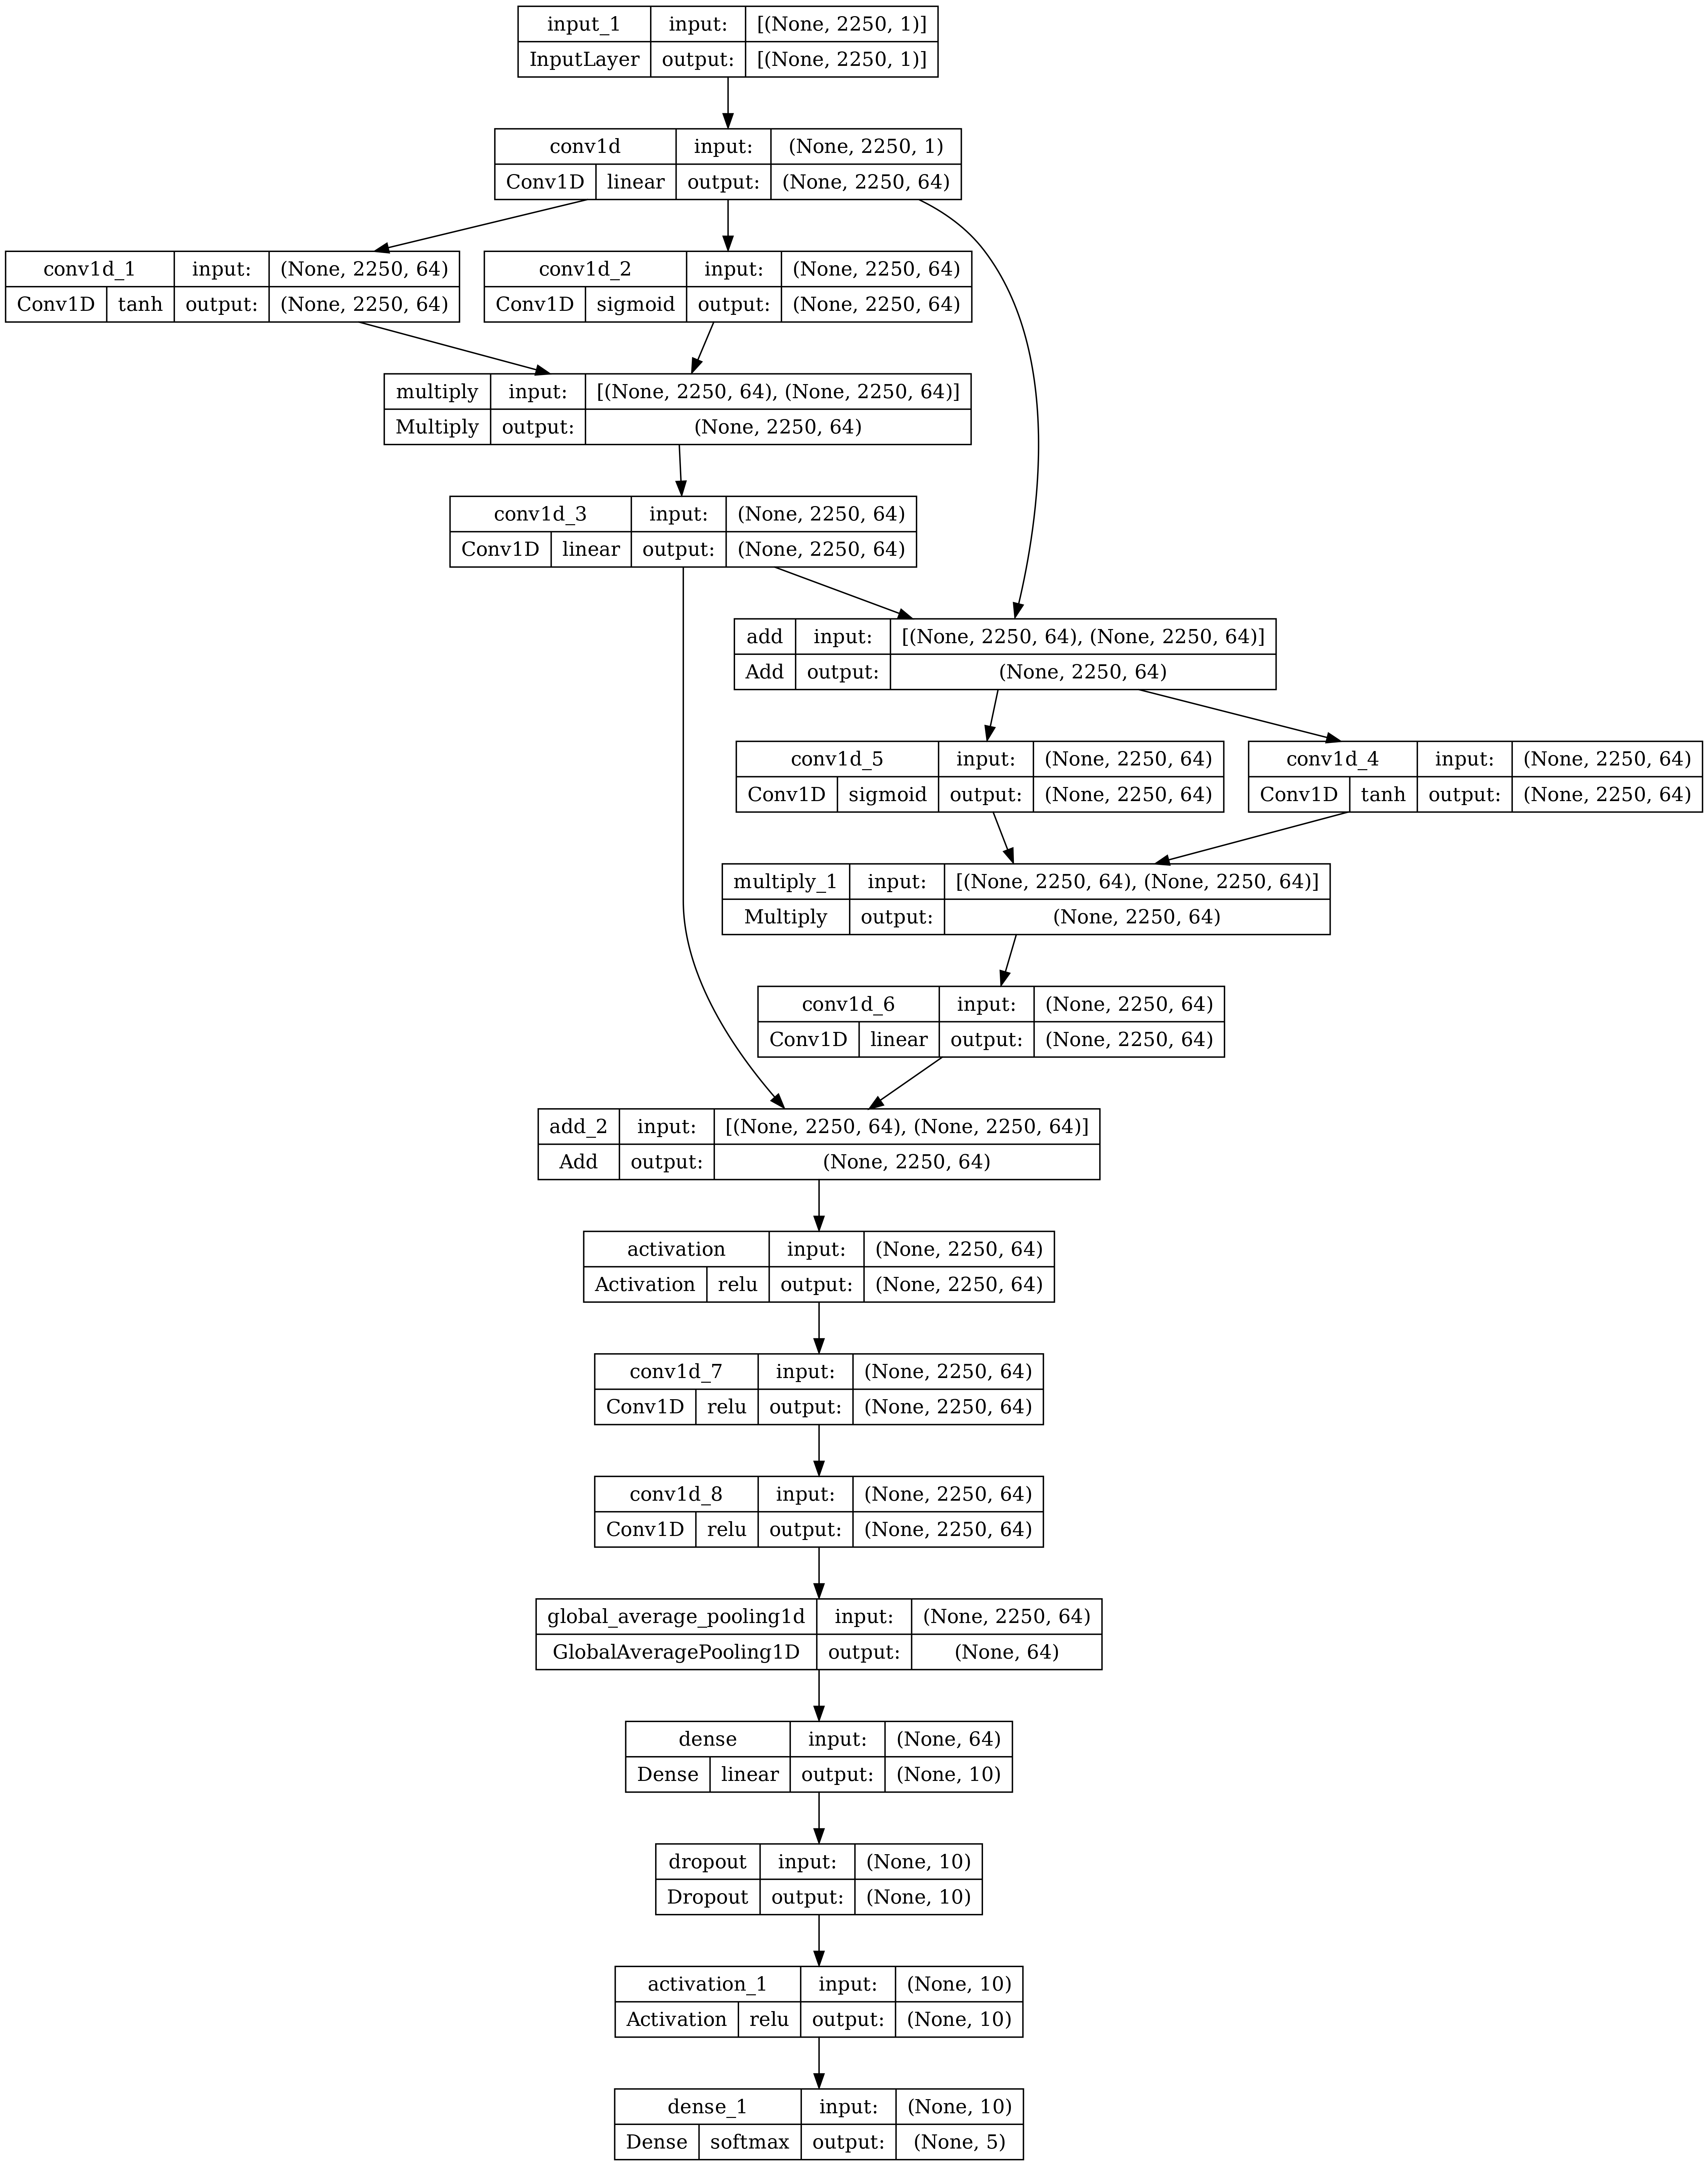

In [7]:
# Plot the model
tf.keras.utils.plot_model(
    model,
    to_file="resBlock.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=300,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False,
)

In [5]:
from keras.layers import Conv1D, Input, Activation, AveragePooling1D, Add, Multiply, GlobalAveragePooling1D
from keras.models import Model
def residual_block(x, i):
    tanh_out = Conv1D(n_filters, 
                      kernel_size, 
                      dilation_rate = kernel_size**i, 
                      padding='causal',
                      activation='tanh'
                      )(x)
    sigm_out = Conv1D(n_filters, 
                      kernel_size, 
                      dilation_rate = kernel_size**i, 
                      padding='causal', 
                      activation='sigmoid'
                      )(x)
    z = Multiply()([tanh_out, sigm_out])
    skip = Conv1D(n_filters, 1)(z)
    res = Add()([skip, x])
    return res, skip
x = Input(shape=input_shape)
skip_connections = []
out = Conv1D(n_filters, 2, dilation_rate=1, padding='causal')(x)
for i in range(1, dilation_depth + 1):
    out, skip = residual_block(out,i)
    skip_connections.append(skip)
out = Add()(skip_connections)
out = Activation('relu')(out)
out = Conv1D(traget,1, padding='same', activation='relu')(out)
out = Conv1D(traget,1 , padding='same', activation='relu')(out)
out = GlobalAveragePooling1D()(out)
out = Activation(activation)(out)

model = Model(x, out)  
model.compile(optimizer='adam', 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 16000, 1)]   0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 16000, 64)    192         ['input_1[0][0]']                
                                                                                                  
 conv1d_1 (Conv1D)              (None, 16000, 64)    8256        ['conv1d[0][0]']                 
                                                                                                  
 conv1d_2 (Conv1D)              (None, 16000, 64)    8256        ['conv1d[0][0]']                 
                                                                                              

In [56]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                   
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

checkpoint_path = 'best.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

import numpy as np
# from focal_loss import SparseCategoricalFocalLoss
from sklearn.model_selection import train_test_split

# Train the model
batch_size = 16
epochs = 100

model.fit(X_train, y_train,callbacks=[checkpoint],validation_split=.2,epochs=epochs ,class_weight=class_weights, batch_size=batch_size)

Epoch 1/100
46/50 [==========================>...] - ETA: 0s - loss: 1.5666 - accuracy: 0.2405
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best.h5
50/50 [==============================] - 13s 23ms/step - loss: 1.5622 - accuracy: 0.2362 - val_loss: 2.1886 - val_accuracy: 0.0000e+00
Epoch 2/100
46/50 [==========================>...] - ETA: 0s - loss: 1.5313 - accuracy: 0.2391
Epoch 2: val_accuracy did not improve from 0.00000
50/50 [==============================] - 1s 14ms/step - loss: 1.5276 - accuracy: 0.2412 - val_loss: 2.3449 - val_accuracy: 0.0000e+00
Epoch 3/100
46/50 [==========================>...] - ETA: 0s - loss: 1.4355 - accuracy: 0.2745
Epoch 3: val_accuracy did not improve from 0.00000
50/50 [==============================] - 1s 14ms/step - loss: 1.4259 - accuracy: 0.2800 - val_loss: 3.1498 - val_accuracy: 0.0000e+00
Epoch 4/100
46/50 [==========================>...] - ETA: 0s - loss: 1.3372 - accuracy: 0.3438
Epoch 4: val_accuracy did not improve 

In [38]:
# for heart data
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                   
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

checkpoint_path = 'best.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

import numpy as np
# from focal_loss import SparseCategoricalFocalLoss
from sklearn.model_selection import train_test_split

# Train the model
batch_size = 16
epochs = 100

model.fit(X_train, y_train,callbacks=[checkpoint],validation_split=.2,epochs=epochs ,class_weight=class_weights, batch_size=batch_size)

Epoch 1/100


ValueError: in user code:

    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'model_7' (type Functional).
    
    Input 0 of layer "conv1d_77" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (16, 2250)
    
    Call arguments received by layer 'model_7' (type Functional):
      • inputs=tf.Tensor(shape=(16, 2250), dtype=float32)
      • training=True
      • mask=None


In [ ]:
y_train

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


# Define the learning rate reduction callback
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',    # Monitor validation loss for learning rate reduction
    factor=0.5,            # Reduce learning rate by a factor
    patience=3,            # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6            # Minimum learning rate
)

# Define the model checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Define the early stopping callback to stop training if validation loss does not improve
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# Train the model with history tapping (keeps data in a dictionary)
epochs = 100
batch_size = 64
history = model.fit(x_train, y_train, 
                    validation_data=(x_val,y_val),
                    epochs=epochs, 
                    batch_size=batch_size,
                    callbacks=[lr_callback,checkpoint_callback,early_stopping_callback],
                    shuffle=True
                   )

# Evaluate the model
best_model = tf.keras.models.load_model('best_model.h5')
loss, accuracy = best_model.evaluate(x_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/100
10/10 [==============================] - 12s 108ms/step - loss: 1.6112 - accuracy: 0.1875 - val_loss: 1.6089 - val_accuracy: 0.2250 - lr: 0.0010
Epoch 2/100
10/10 [==============================] - 1s 52ms/step - loss: 1.6068 - accuracy: 0.2438 - val_loss: 1.6086 - val_accuracy: 0.1688 - lr: 0.0010
Epoch 3/100
10/10 [==============================] - 0s 50ms/step - loss: 1.6011 - accuracy: 0.2531 - val_loss: 1.6031 - val_accuracy: 0.1688 - lr: 0.0010
Epoch 4/100
10/10 [==============================] - 0s 45ms/step - loss: 1.5887 - accuracy: 0.2609 - val_loss: 1.5880 - val_accuracy: 0.2313 - lr: 0.0010
Epoch 5/100
10/10 [==============================] - 0s 45ms/step - loss: 1.5610 - accuracy: 0.2844 - val_loss: 1.5663 - val_accuracy: 0.2125 - lr: 0.0010
Epoch 6/100
10/10 [==============================] - 0s 45ms/step - loss: 1.5314 - accuracy: 0.2734 - val_loss: 1.5267 - val_accuracy: 0.2062 - lr: 0.0010
Epoch 7/100
10/10 [==============================] - 0s 48ms/step - 

In [9]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Get the true labels and predicted probabilities for the test data
# Make predictions
predictions = best_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(y_test, predicted_classes, target_names=class_names)
print("Classification Report:\n", report)

7/7 [==============================] - 0s 6ms/step
Classification Report:
                        precision    recall  f1-score   support

      Aortic Stenosis       0.90      0.63      0.74        41
 Mitral Regurgitation       0.65      0.84      0.73        44
      Mitral Stenosis       0.59      0.88      0.71        34
Mitral Valve Prolapse       0.88      0.39      0.55        38
               Normal       0.93      1.00      0.97        43

             accuracy                           0.76       200
            macro avg       0.79      0.75      0.74       200
         weighted avg       0.80      0.76      0.74       200



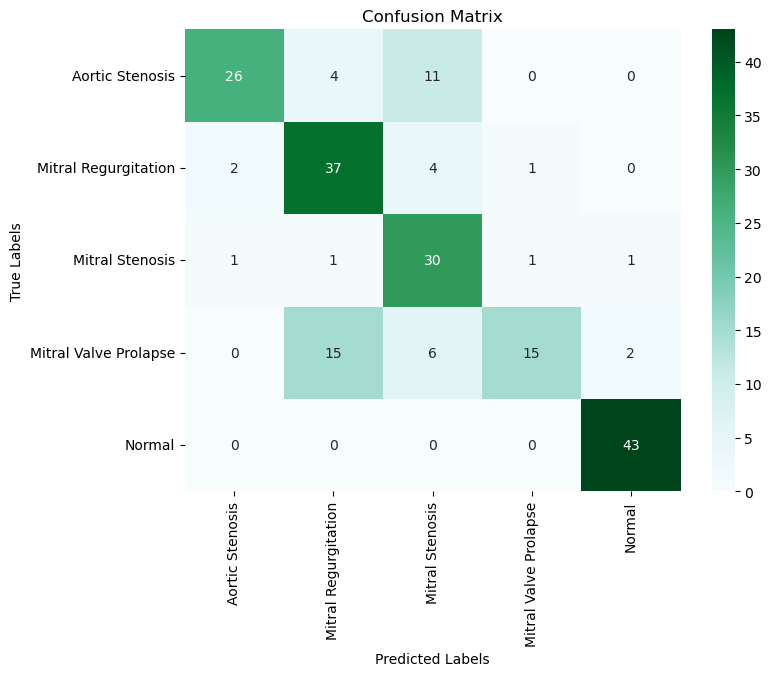

In [10]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="BuGn", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

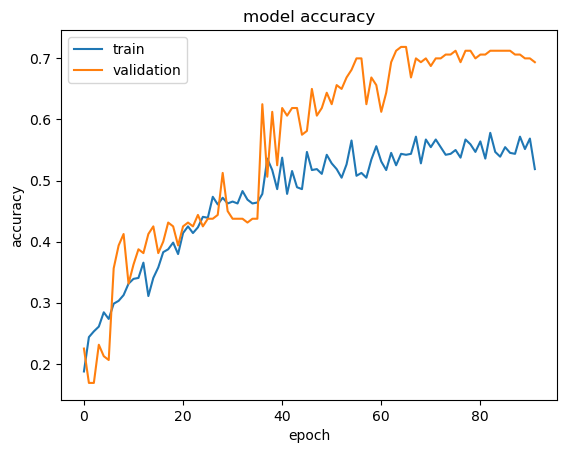

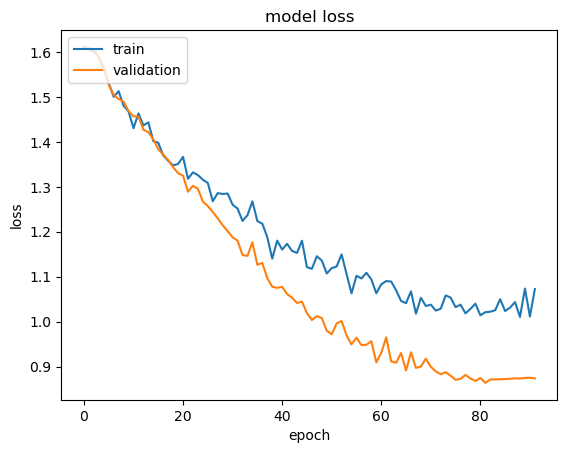

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()